In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Task 1: Loading and Inspecting the Data

We will be working with a dataset of audiobooks downloaded from audible.in from 1998 to 2025 (pre-planned releases). [Source](https://www.kaggle.com/datasets/snehangsude/audible-dataset)

The first thing we will do is load the raw audible data.

### Instructions:
* Using pandas, read the `audible_raw.csv` file that is located inside the `data` folder in our local directory. Assign to `audible`.
* Show the first few rows of the `audible` data frame.

In [3]:
# Load the audible_raw.csv file
audible = pd.read_csv(r'./data/audible_raw.csv')
# View the first rows of the dataframe
audible.head()

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00


### 💾 The data

- "name" - The name of the audiobook.
- "author" - The audiobook's author.
- "narrator" - The audiobook's narrator.
- "time" -  The audiobook's duration, in hours and minutes.
- "releasedate" -  The date the audiobook was published.
- "language" -  The audiobook's language.
- "stars" -  The average number of stars (out of 5) and the number of ratings (if available).
- "price" -  The audiobook's price in INR (Indian Rupee).

 We can use the `.info()` method to inspect the data types of the columns

In [4]:
# Inspect the columns' data types
audible.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         87489 non-null  object
 1   author       87489 non-null  object
 2   narrator     87489 non-null  object
 3   time         87489 non-null  object
 4   releasedate  87489 non-null  object
 5   language     87489 non-null  object
 6   stars        87489 non-null  object
 7   price        87489 non-null  object
dtypes: object(8)
memory usage: 5.3+ MB


## Task 2: Clean text data in Author and Narrator columns

We will start cleaning some of the text columns like `author` and `narrator`. We can remove the `Writtenby:` and `Narratedby:` portions of the text in those columns.

For this, we will use the `.str.replace()` method

### Instructions:
* Remove 'Writtenby:' from the `author` column
* Remove 'Narratedby:' from the `narrator` column
* Check the results

In [7]:
# Remove Writtenby: from the author column
audible['author'] = audible['author'].str.replace('Writtenby:', '')
# Remove Narratedby: from the narrator column
audible['narrator'] = audible['narrator'].str.replace('Narratedby:', '')
# Check the results
audible.head()

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,JeffKinney,DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,RickRiordan,SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00


## Task 3: Extract number of stars and ratings from Stars column.

The `stars` column combines the number of stars and the number of ratins. Let's turn this into numbers and split it into two columns: `rating_stars` and `n_ratings`.

First we will use the `.sample()` method to get a glimpse at the type of entries in that column.

In [11]:
# Get a glimpse of the stars column
audible['stars'].sample(10)

81452                   Not rated yet
81662                   Not rated yet
49787    4.5 out of 5 stars39 ratings
34924                   Not rated yet
59180       4 out of 5 stars9 ratings
41664                   Not rated yet
43874                   Not rated yet
2488                    Not rated yet
48608                   Not rated yet
84312                   Not rated yet
Name: stars, dtype: object

Since there are many instances of `Not rated yet`, let's filter them out and sample again:

In [12]:
# Explore the values of the star column that are not 'Not rated yet'
audible[audible['stars'] != 'Not rated yet']['stars'].sample(10)

82211       5 out of 5 stars4 ratings
62888        5 out of 5 stars1 rating
29419       5 out of 5 stars2 ratings
63691    4.5 out of 5 stars11 ratings
43732        1 out of 5 stars1 rating
64334        5 out of 5 stars1 rating
80213        5 out of 5 stars1 rating
20390     4.5 out of 5 stars2 ratings
47816        5 out of 5 stars1 rating
27         5 out of 5 stars18 ratings
Name: stars, dtype: object

As a first step, we can replace the instances of `Not rated yet` with `NaN`

In [25]:
audible['stars'].replace('Not rated yet', np.nan, inplace=True)

We can use `.str.extract()` to get the number of stars and the number of ratings into their own columns.

### Instructions:
* Extract the number of stars into the `rating_stars` column
* Extract the number of ratings into the `n_ratings` column
* Convert both new columns to float

In [31]:
# Extract number of stars into rating_stars and turn into float
audible['rating_stars'] = audible['stars'].str.extract('^([\d.]+)').astype(float)
# Replace the comma, extract number of ratings into n_ratings and turn into float
audible['n_reviews'] = audible['stars'].str.replace(',', '').str.extract('(\d+) rating').astype(float)
# Examine the new rating_stars and n_ratings columns
audible[['rating_stars', 'n_reviews']].head()

,rating_stars,n_reviews
0,5.0,34.0
1,4.5,41.0
2,4.5,38.0
3,4.5,12.0
4,4.5,181.0


As a last step, let's delete the `stars` column using the `.drop` command:

In [33]:
# Drop the stars column
audible.drop(columns=['stars'], axis=1, inplace=True)
# Check the results
audible.head()

,name,author,narrator,time,releasedate,language,price,rating_stars,n_reviews
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,04-08-08,English,468.00,5.0,34.0
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,01-05-18,English,820.00,4.5,41.0
2,The Deep End,JeffKinney,DanRussell,2 hrs and 3 mins,06-11-20,English,410.00,4.5,38.0
3,Daughter of the Deep,RickRiordan,SoneelaNankani,11 hrs and 16 mins,05-10-21,English,615.00,4.5,12.0
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hrs,13-01-10,English,820.00,4.5,181.0


## Task 4: Change data types

Another important step is to have our data in the correct data types

### Instructions:
* Set `price` to float
* Turn `rating_stars` to category
* Convert `releasedate` to datetime

In [37]:
# Explore the price column
audible['price'].sample(10)

4550       315.00
43607      668.00
54369      367.00
56725      585.00
11542      820.00
29725      469.00
5040        82.00
54443      323.00
75904      668.00
76011    1,172.00
Name: price, dtype: object

We need to get rid of the comma and the word 'Free' before we can convert the data.

In [39]:
# Replace the comma with ''
audible['price'] = audible['price'].str.replace(',', '')
# Replace 'Free' with 0
audible['price'].replace('Free', 0, inplace=True)
# Turn price to float
audible['price'] = audible['price'].astype(float)

* Turn `rating_stars` to category

Since `stars` can only take a small number of discrete values, the best data type for the column is `category`.

Let's first look at the unique values in that column to confirm:

In [40]:
# Look at the unique values in the rating_stars column
audible['rating_stars'].unique()

array([5. , 4.5, 4. , nan, 3.5, 3. , 1. , 2. , 2.5, 1.5])

We can now use `.astype` to change the data type.

In [45]:
# Turn rating_stars to category
audible['rating_stars'] = audible['rating_stars'].astype('category')

* Convert `releasedate` date to datetime

Here we will use the `to_datetime()` function to turn the dates into datetime objects:

In [46]:
audible.dtypes

name              object
author            object
narrator          object
time              object
releasedate       object
language          object
price            float64
rating_stars    category
n_reviews        float64
dtype: object

In [47]:
# Convert releasedate to datetime
audible['releasedate'] = pd.to_datetime(audible['releasedate'])
# Inspect the dataframe 
audible.dtypes

name                    object
author                  object
narrator                object
time                    object
releasedate     datetime64[ns]
language                object
price                  float64
rating_stars          category
n_reviews              float64
dtype: object

## Task 5: Extract hours and minutes from the `time` column

The `time` column combines the number of hours and minutes into one column. We want to transform and consolidate the information into a new `time_minutes` column.

In [48]:
# Explore the values in the time column
audible['time'].sample(10)

65057     7 hrs and 36 mins
65591     5 hrs and 24 mins
16770     8 hrs and 46 mins
68099     10 hrs and 2 mins
29944               51 mins
86678      1 hr and 11 mins
71255     9 hrs and 46 mins
24906     7 hrs and 10 mins
72547     11 hrs and 4 mins
38472    10 hrs and 33 mins
Name: time, dtype: object

Let's see what other ways they have encoded `min` or `minutes`:

In [58]:
audible.time.str.split().str[-1].value_counts()

mins      84436
min        1649
hrs        1158
hr          185
minute       61
Name: time, dtype: int64

In [64]:
audible.time.str.split().str[1].value_counts()

hr      74083
min     13345
than       61
Name: time, dtype: int64

In [65]:
audible[audible.time.str.split().str[1]=='than']

,name,author,narrator,time,releasedate,language,price,rating_stars,n_reviews
1401,The Story of Ice Cream,StacyTaus-Bolstad,BookBuddyDigitalMedia,Less than 1 min,2021-01-01,English,164.0,NaN,NaN
1403,The Story of Salt,LisaOwings,BookBuddyDigitalMedia,Less than 1 min,2021-01-01,English,164.0,NaN,NaN
1404,The Story of Milk,StacyTaus-Bolstad,BookBuddyDigitalMedia,Less than 1 min,2021-01-01,English,164.0,NaN,NaN
1408,The Story of an Apple,StacyTaus-Bolstad,BookBuddyDigitalMedia,Less than 1 min,2021-01-01,English,164.0,NaN,NaN
1409,We Like the Summer,KatiePeters,BookBuddyDigitalMedia,Less than 1 min,2021-01-01,English,164.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
87171,第二十五話サン・ミシェルのいいカフェ：ぼくの旅の手帖〜または珈琲のある風景,森本哲郎,小野田英一,Less than 1 min,2015-11-20,japanese,139.0,NaN,NaN
87175,第九話オラン最後の夕べ：ぼくの旅の手帖〜または珈琲のある風景,森本哲郎,小野田英一,Less than 1 min,2015-11-19,japanese,139.0,NaN,NaN
87176,第一話リューベックの追憶:ぼくの旅の手帖〜または珈琲のある風景,森本哲郎,小野田英一,Less than 1 min,2015-07-23,japanese,139.0,NaN,NaN
87180,第七話バグダードの茶屋:ぼくの旅の手帖〜または珈琲のある風景,森本哲郎,小野田英一,Less than 1 min,2015-07-13,japanese,139.0,NaN,NaN


In [63]:
# Search the entries in the time column for different spellings of min. Let' try min, mins, minutes
audible.time.str.split().str[-1].value_counts()

min    86146
hr      1343
Name: time, dtype: int64

We can see that we need to fix the following:
* hr, hrs -> consolidate as `hr`
* min, mins -> consolidate as `min`
* Less than 1 minute -> round to 1 min

In [62]:
# Replace hrs, mins, and 'Less than 1 minute'
def multi_replace(df, col, lst, rep):
    for _ in lst:
        df[col] = df[col].str.replace(_, rep)
    return df

audible = multi_replace(audible, 'time', ['hrs'], 'hr')
audible = multi_replace(audible, 'time', ['mins', 'minute'], 'min')

Let's see how it looks now:

In [17]:
# Check the results


The next step is to extract the number of hours and minutes from the text, then combine in a new `time_mins` column.

### Instructions: 
* Extract the number of hours from `time`. Assign to the `hours` variable.
* Extract the number of minutes from `time`. Assign to the `mins` variable.
* Create the `time_mins` column combining hours and minutes.

In [66]:
# Extract the number of hours, turn to integer
audible['hours'] = audible['time'].str.extract(r'(\d+) hr').fillna(0).astype(int)
# Extract the number of minutes, turn to integer
audible['minutes'] = audible['time'].str.extract(r'(\d+) min').fillna(0).astype(int)
# Combine hours and minutes into the time_mins column
audible['time_mins'] = (audible['hours']*60)+(audible['minutes'])
# Check the results
audible.sample(10)

,name,author,narrator,time,releasedate,language,price,rating_stars,n_reviews,hours,minutes,time_mins
72059,Forever Tuesday (German edition),"WhitneyG.,MichaelaLink-Übersetzer","FrankaBöhm,ValentinJägel",5 hr and 58 min,2021-12-15,german,334.0,NaN,NaN,5,58,358
6365,The Story of King Arthur,BeatriceClay,PaulSpera,1 hr and 44 min,2018-12-04,English,225.0,NaN,NaN,1,44,104
78386,Cowboy Fever,JoanneKennedy,AveryReid,10 hr and 38 min,2019-12-31,English,1172.0,NaN,NaN,10,38,638
77029,My boss,EmilyJurius,"SlimaneYefsah,AxelleBossard",3 hr and 58 min,2021-01-07,french,225.0,NaN,NaN,3,58,238
81717,Cork Boat,JohnPollack,JohnPollack,5 hr and 25 min,2004-01-14,English,651.0,NaN,NaN,5,25,325
26451,Nella setta,"FlaviaPiccinni,CarmineGazzanni",LilianaBottone,11 hr and 52 min,2021-04-03,italian,766.0,NaN,NaN,11,52,712
50765,The Woman with the Map,JanCasey,PenelopeFreeman,14 hr,2022-01-04,English,865.0,NaN,NaN,14,0,840
52824,My Name Is Will,JessWinfield,JessWinfield,10 hr and 31 min,2009-07-22,English,500.0,NaN,NaN,10,31,631
80584,La Prophétie des abeilles,BernardWerber,AurélienRingelheim,16 hr and 9 min,2021-10-11,french,887.0,NaN,NaN,16,9,969
19492,Priyanka Chopra,AseemChhabra,SanketMhatre,6 hr and 9 min,2018-11-30,English,459.0,3.5,7.0,6,9,369


And as final step, let's delete the columns we don't need any more:

In [68]:
# Drop the time column
audible.drop(columns=['time'], inplace=True)
audible.head()

,name,author,narrator,releasedate,language,price,rating_stars,n_reviews,hours,minutes,time_mins
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2008-04-08,English,468.0,5.0,34.0,2,20,140
1,The Burning Maze,RickRiordan,RobbieDaymond,2018-01-05,English,820.0,4.5,41.0,13,8,788
2,The Deep End,JeffKinney,DanRussell,2020-06-11,English,410.0,4.5,38.0,2,3,123
3,Daughter of the Deep,RickRiordan,SoneelaNankani,2021-05-10,English,615.0,4.5,12.0,11,16,676
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,2010-01-13,English,820.0,4.5,181.0,10,0,600


Here is how our dataframe looks now:

In [69]:
# Inspect the dataframe 
audible.dtypes

name                    object
author                  object
narrator                object
releasedate     datetime64[ns]
language                object
price                  float64
rating_stars          category
n_reviews              float64
hours                    int64
minutes                  int64
time_mins                int64
dtype: object

## Task 6: Check data ranges

Another important step is to confirm that the values in our columns are in the expected ranges and that we don't have out-of-range values.

Let's create a histogram of the numeric columns to visually inspect ht ranges and the shape of the distribution:

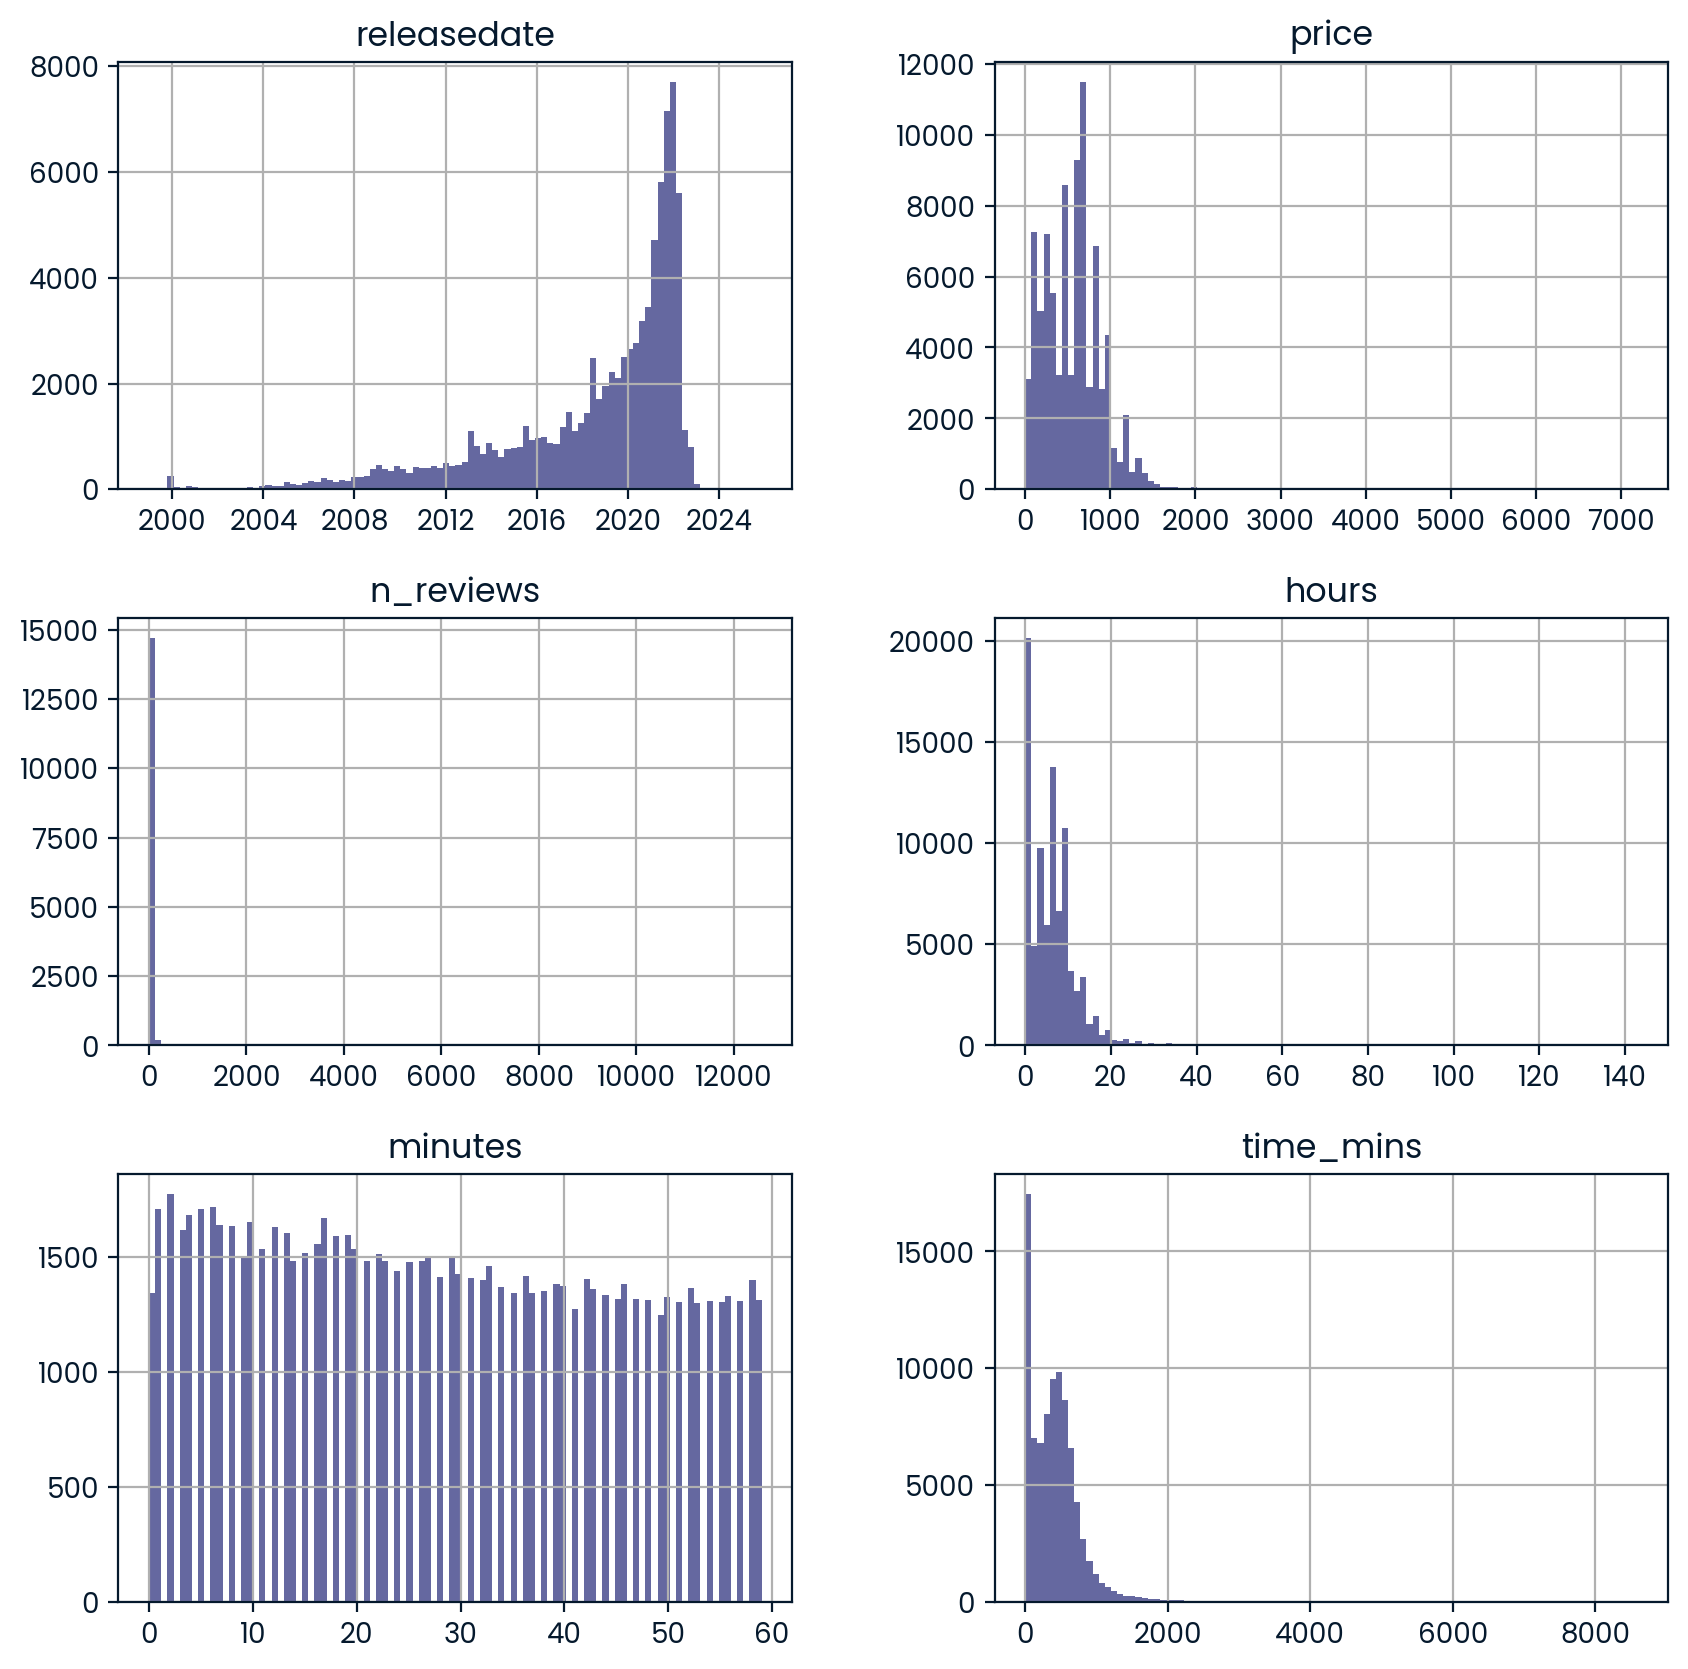

In [70]:
# Plot histograms of all the numerical columns
audible.hist(figsize=(10,10), bins=100)
plt.show()

Additionally, we can use `.describe()` to look at a summary of our data

In [71]:
# Look at the numeric columns
audible.describe()

,price,n_reviews,hours,minutes,time_mins
count,87489.000000,15072.000000,87489.000000,87489.000000,87489.000000
mean,559.009246,21.613190,6.489570,28.123456,417.497663
std,336.096642,207.479634,6.060178,17.337883,364.559399
min,0.000000,1.000000,0.000000,0.000000,1.000000
25%,268.000000,1.000000,2.000000,13.000000,142.000000
50%,585.000000,2.000000,6.000000,27.000000,386.000000
75%,755.000000,7.000000,9.000000,43.000000,584.000000
max,7198.000000,12573.000000,143.000000,59.000000,8595.000000


In [72]:
# Look at the non numeric columns
audible.describe(exclude=[np.number])

,name,author,narrator,releasedate,language,rating_stars
count,87489,87489,87489,87489,87489,15072.0
unique,82767,48374,29717,5058,36,9.0
top,The Art of War,"矢島雅弘,石橋遊",anonymous,2018-05-16 00:00:00,English,5.0
freq,20,874,1034,773,61884,6761.0
first,NaN,NaN,NaN,1998-12-27 00:00:00,NaN,NaN
last,NaN,NaN,NaN,2025-11-14 00:00:00,NaN,NaN


We will transform the prices in `price` to USD for this exercise. We can use the exchange rate of 1 USD = 0.012 INR:

In [73]:
# Transform prices to USD (multiply times 0.012)
audible['USD'] = audible['price']*0.012
# Check the results
audible.head()

,name,author,narrator,releasedate,language,price,rating_stars,n_reviews,hours,minutes,time_mins,USD
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2008-04-08,English,468.0,5.0,34.0,2,20,140,5.616
1,The Burning Maze,RickRiordan,RobbieDaymond,2018-01-05,English,820.0,4.5,41.0,13,8,788,9.840
2,The Deep End,JeffKinney,DanRussell,2020-06-11,English,410.0,4.5,38.0,2,3,123,4.920
3,Daughter of the Deep,RickRiordan,SoneelaNankani,2021-05-10,English,615.0,4.5,12.0,11,16,676,7.380
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,2010-01-13,English,820.0,4.5,181.0,10,0,600,9.840


There values in the `language` column have different capitalization. Let's fix that.

In [74]:
# Inspect the language column before making changes
audible['language'].value_counts()

English             61884
german               8295
spanish              3496
japanese             3167
italian              2694
french               2386
russian              1804
danish                935
portuguese            526
swedish               515
Hindi                 436
polish                224
finnish               197
dutch                 190
tamil                 161
catalan               153
mandarin_chinese       97
icelandic              52
romanian               50
hungarian              36
urdu                   34
afrikaans              28
czech                  23
turkish                20
greek                  18
arabic                 16
norwegian              16
galician               10
bulgarian               9
korean                  4
slovene                 4
hebrew                  2
basque                  2
telugu                  2
lithuanian              2
ukrainian               1
Name: language, dtype: int64

In [75]:
# Update capitalization in the language column
audible['language'] = audible['language'].str.capitalize()
# Check the results
audible['language'].value_counts()

English             61884
German               8295
Spanish              3496
Japanese             3167
Italian              2694
French               2386
Russian              1804
Danish                935
Portuguese            526
Swedish               515
Hindi                 436
Polish                224
Finnish               197
Dutch                 190
Tamil                 161
Catalan               153
Mandarin_chinese       97
Icelandic              52
Romanian               50
Hungarian              36
Urdu                   34
Afrikaans              28
Czech                  23
Turkish                20
Greek                  18
Arabic                 16
Norwegian              16
Galician               10
Bulgarian               9
Korean                  4
Slovene                 4
Hebrew                  2
Basque                  2
Telugu                  2
Lithuanian              2
Ukrainian               1
Name: language, dtype: int64

## Task 7: Checking for duplicates

How many duplicates do we have?

As a first step look for duplicates using `.duplicated()` and `.sum()`:

In [76]:
# Look for duplicate rows
audible.duplicated().sum()

0

It is useful to look for duplicates only using a subset of the columns that make sense. We will use the following subset of columns:
* name
* author
* narrator
* time_mins
* price

Here we use `.duplicated()` again, but with our subset of columns.

In [78]:
# Create a list of our subset columns and assign to subset_cols
subset_cols = ['name', 'author', 'narrator', 'time_mins', 'price']
# Check for duplicates using our subset of columns
audible.duplicated(subset=subset_cols).sum()

70

Let's look at those values (use `keep=false`) and see what is going on:

In [81]:
# Check the duplicated rows keeping the duplicates and order by the name column
audible[audible.duplicated(subset=subset_cols, keep=False)].sort_values(by='name')

,name,author,narrator,releasedate,language,price,rating_stars,n_reviews,hours,minutes,time_mins,USD
63978,"""Das Böse ist des Menschen beste Kraft""",ChristianLiederer,ThomasKrause,2021-12-14,German,233.0,NaN,NaN,2,24,144,2.796
63965,"""Das Böse ist des Menschen beste Kraft""",ChristianLiederer,ThomasKrause,2021-12-23,German,233.0,NaN,NaN,2,24,144,2.796
24625,90 Minutes in Heaven,"DonPiper,CecilMurphey",DonPiper,2015-09-25,English,586.0,NaN,NaN,8,15,495,7.032
24116,90 Minutes in Heaven,"DonPiper,CecilMurphey",DonPiper,2020-10-15,English,586.0,NaN,NaN,8,15,495,7.032
16971,Adagio in Dm,BillBrown,BillBrown,2021-06-08,English,456.0,NaN,NaN,1,18,78,5.472
...,...,...,...,...,...,...,...,...,...,...,...,...
18338,What I Talk About When I Talk About Running,HarukiMurakami,RayPorter,2016-07-07,English,398.0,4.5,193.0,4,23,263,4.776
38021,When Women Ruled the World,KaraCooney,KaraCooney,2018-11-30,English,836.0,4.5,14.0,9,15,555,10.032
20260,When Women Ruled the World,KaraCooney,KaraCooney,2018-11-30,English,836.0,4.5,13.0,9,15,555,10.032
22158,Wings of Fire,"APJAbdulKalam,ArunTiwari",GirishKarnad,2020-01-04,English,75.0,5.0,1823.0,1,15,75,0.900


We can see that the duplicates are for files with different release dates. We can decide to keep the record with the last release date.

We will can use the `drop_duplicates()` method with the same subset and using `keep=last` to keep the last release date

In [82]:
# Drop duplicated rows keeping the last release date
audible.drop_duplicates(subset=subset_cols, keep='last', inplace=True)

We can check again for duplicates:

In [84]:
# Check again for duplicates using our subset of columns

audible.duplicated(subset=subset_cols).sum()

0

## Task 8: Dealing with missing data

Before we finish, let's take a look at missing data in our columns. We can use the `.isna()` method and chain it with `.sum()` to get the total:

In [85]:
# Check for null values
audible.isnull().sum()

name                0
author              0
narrator            0
releasedate         0
language            0
price               0
rating_stars    72387
n_reviews       72387
hours               0
minutes             0
time_mins           0
USD                 0
dtype: int64

We could turn the **NaN** values to 0 or another numeric value, or we could keep them. It depends on our use case.

If we want to plot the ratings distribution, it can make sense to drop audiobooks with no ratings. But if we need to use the distribution of prices for our analysis, then removing audiobooks with no ratings will bias our results (since unrated audiobooks are likely more niche and might have a different pricing structure than rated audiobooks).

We will keep the unrated audiobooks for now.

## Task 9: Save the cleaned data set

We can use the `.to_csv` method to save the clean file. We include `index=False` so that we don't also copy the current index to our destination file.

In [86]:
# Save the dataframe to a new file: 'audible_clean.csv'
audible.to_csv('./data/audible_clean.csv')